In [ ]:
import nltk
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from urllib.request import urlopen
import re
import inflect
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk import FreqDist
from collections import Counter
nltk.download('brown')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
p = inflect.engine()
lemmatizer = WordNetLemmatizer()

In [ ]:
def read_book(url):
  return urlopen(url).read()

In [ ]:
def print_book_title_and_length(book):
  print(book[:75],len(book))

In [ ]:
def decode_book(book):
  return book.decode('utf-8')

In [ ]:
def discard_useless_part (text):
  sidx = text.find('*** START OF THIS PROJECT ')
  eidx = text.find('*** END OF THIS PROJECT ')
  print("Discarding Before - ", sidx)
  print("Discarding After - ", eidx)
  text = text[sidx:eidx]
  return text

In [ ]:
def to_lower(text):
  return text.lower()

In [ ]:
def remove_URL(text):
    return re.sub(r"http\S+", "", text)

In [ ]:
def decontracted(text):
    # specific
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)

    # general
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

In [ ]:
def remove_punctuation(text):
  tokens = word_tokenize(text)
  words = [word for word in tokens if word.isalpha()]
  return ' '.join(words)

In [ ]:
def num2word(text):
  list_of_words = text.split()
  modified_text = []

  for word in list_of_words:
    if word.isdigit():
      number_in_word = p.number_to_words(word)
      modified_text.append(number_in_word)
    else:
      modified_text.append(word)
      
  return ' '.join(modified_text)

In [ ]:
def lemmatize_word(text): 
    word_tokens = word_tokenize(text)  
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens] 
    return ' '.join(lemmas) 
  

In [ ]:
url1 = 'http://www.gutenberg.org/files/1342/1342-0.txt'
url2 = 'http://www.gutenberg.org/files/98/98-0.txt'

def PreProcessedBook(url):
  book = read_book(url)
  print_book_title_and_length(book)
  text = decode_book(book)
  text = discard_useless_part(text)
  text = to_lower(text)
  text = remove_URL(text)
  text = decontracted(text)
  text = num2word(text)
  text = remove_punctuation(text)
  text = lemmatize_word(text)
  return (text)


In [ ]:
book1_text = PreProcessedBook(url1)
book2_text = PreProcessedBook(url2)

b'\xef\xbb\xbf\r\nThe Project Gutenberg EBook of Pride and Prejudice, by Jane Austen\r\n\r\n' 799738
Discarding Before -  519
Discarding After -  771251
b'\xef\xbb\xbfThe Project Gutenberg EBook of A Tale of Two Cities, by Charles Dickens\r' 807615
Discarding Before -  774
Discarding After -  774496


In [ ]:
def noun(text):
  is_noun = lambda pos: pos[:1] == 'N'
  tokenized = nltk.word_tokenize(text)
  nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
  return nouns
 

In [ ]:
noun1=noun(book1_text)
noun2=noun(book2_text)

In [ ]:
print("Number of nouns in book 1 and book 2 respectively are "+ str(len(noun1))+" and "+ str(len(noun2)))

Number of nouns in book 1 and book 2 respectively are 23981 and 31305


In [ ]:
def verb(text):
  is_verb = lambda pos: pos[:1] == 'V'
  tokenized = nltk.word_tokenize(text)
  verbs = [word for (word, pos) in nltk.pos_tag(tokenized) if is_verb(pos)] 
  return verbs

In [ ]:
verb1=verb(book1_text)
verb2=verb(book2_text)

In [ ]:
print("Number of verbs in book 1 and book 2 respectively are "+ str(len(verb1))+" and "+ str(len(verb2)))

Number of verbs in book 1 and book 2 respectively are 21811 and 22054


In [ ]:
from nltk.corpus import wordnet as wn

In [ ]:
#gives the categories of nouns or verb that the word belongs to
from nltk.corpus import wordnet as wn
def synset(words):
  categories=[]
  for word in words:
    cat=[]
    for synset in wn.synsets(word):
      if(('noun' in synset.lexname()) & ('Tops' not in synset.lexname()) ):
        cat.append(synset.lexname())
      if('verb' in synset.lexname()):
        cat.append(synset.lexname())
    categories.append(cat)
  return categories

In [ ]:
noun_syn1=synset(noun1)
noun_syn2=synset(noun2)
verb_syn1=synset(verb1)
verb_syn2=synset(verb2)

In [ ]:
print(noun1[88])

neighbourhood


In [ ]:
print(noun_syn1[88][:])

['noun.location', 'noun.group']


In [ ]:
#GIVES TOTAL NOUN LEXNAMES AND TOTAL VERB LEXNAMES FOR FREQUENCY DISTRIBUTIONS
def all_synsets(no,ve):
  nouns=[]
  verbs=[]
  for word in no:
    for synset in wn.synsets(word): 
      if(('noun' in synset.lexname()) & ('Tops' not in synset.lexname()) ):
        nouns.append(synset.lexname())
      if('verb' in synset.lexname()):
        verbs.append(synset.lexname())
  for word in ve:
    for synset in wn.synsets(word): 
      if(('noun' in synset.lexname()) & ('Tops' not in synset.lexname()) ):
        nouns.append(synset.lexname())
      if('verb' in synset.lexname()):
        verbs.append(synset.lexname())
      
  return nouns,verbs

In [ ]:
noun_superset1,verb_superset1=all_synsets(noun1,verb1)
noun_superset2,verb_superset2=all_synsets(noun2,verb2)

In [ ]:
print(noun_superset1)

['noun.event', 'noun.time', 'noun.act', 'noun.act', 'noun.act', 'noun.location', 'noun.communication', 'noun.attribute', 'noun.act', 'noun.cognition', 'noun.feeling', 'noun.feeling', 'noun.attribute', 'noun.group', 'noun.act', 'noun.cognition', 'noun.food', 'noun.person', 'noun.person', 'noun.person', 'noun.communication', 'noun.group', 'noun.communication', 'noun.cognition', 'noun.communication', 'noun.communication', 'noun.communication', 'noun.state', 'noun.communication', 'noun.communication', 'noun.attribute', 'noun.communication', 'noun.communication', 'noun.attribute', 'noun.feeling', 'noun.feeling', 'noun.attribute', 'noun.group', 'noun.act', 'noun.cognition', 'noun.person', 'noun.communication', 'noun.time', 'noun.group', 'noun.group', 'noun.event', 'noun.communication', 'noun.time', 'noun.group', 'noun.group', 'noun.event', 'noun.communication', 'noun.time', 'noun.group', 'noun.group', 'noun.event', 'noun.communication', 'noun.time', 'noun.group', 'noun.group', 'noun.event', 

In [ ]:
len(noun_superset1)

135183

([<matplotlib.axis.XTick at 0x7fe343cfbd68>,
 [Text(0, 0, '0'),
  Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10'),
  Text(0, 0, '11'),
  Text(0, 0, '12'),
  Text(0, 0, '13'),
  Text(0, 0, '14'),
  Text(0, 0, '15'),
  Text(0, 0, '16'),
  Text(0, 0, '17'),
  Text(0, 0, '18'),
  Text(0, 0, '19'),
  Text(0, 0, '20'),
  Text(0, 0, '21'),
  Text(0, 0, '22'),
  Text(0, 0, '23'),
  Text(0, 0, '24')])

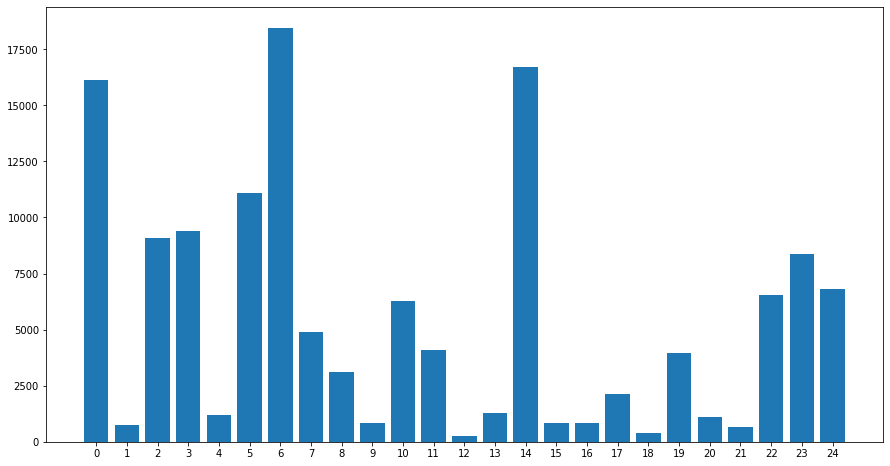

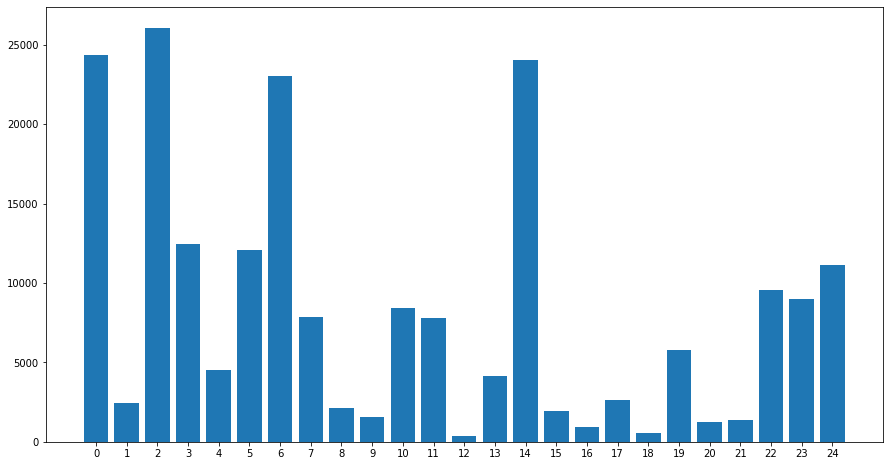

In [ ]:
import numpy as np
labels, counts = np.unique(noun_superset1,return_counts=True)
import matplotlib.pyplot as plt 
ticks = range(len(counts))
plt.figure(figsize=(15,8))
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, range(len(labels)))
labels, counts = np.unique(noun_superset2,return_counts=True)
ticks = range(len(counts))
plt.figure(figsize=(15,8))
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, range(len(labels)))

In [ ]:
print(labels)

['noun.act' 'noun.animal' 'noun.artifact' 'noun.attribute' 'noun.body'
 'noun.cognition' 'noun.communication' 'noun.event' 'noun.feeling'
 'noun.food' 'noun.group' 'noun.location' 'noun.motive' 'noun.object'
 'noun.person' 'noun.phenomenon' 'noun.plant' 'noun.possession'
 'noun.process' 'noun.quantity' 'noun.relation' 'noun.shape' 'noun.state'
 'noun.substance' 'noun.time']


([<matplotlib.axis.XTick at 0x7fe34a545438>,
 [Text(0, 0, '0'),
  Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10'),
  Text(0, 0, '11'),
  Text(0, 0, '12'),
  Text(0, 0, '13'),
  Text(0, 0, '14')])

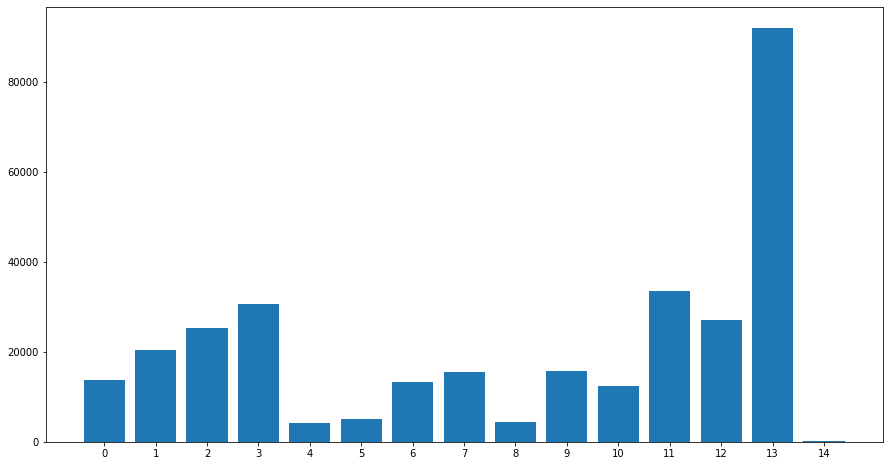

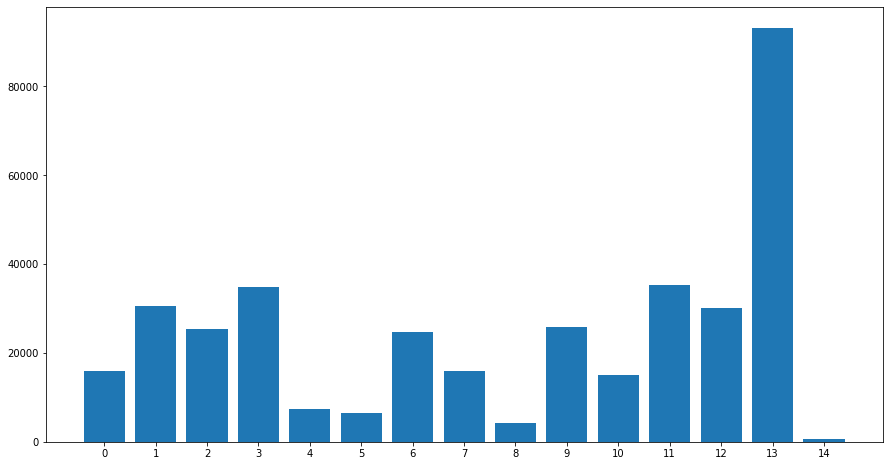

In [ ]:
labels, counts = np.unique(verb_superset1,return_counts=True)
ticks = range(len(counts))
plt.figure(figsize=(15,8))
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, range(len(labels)))
labels, counts = np.unique(verb_superset2,return_counts=True)
ticks = range(len(counts))
plt.figure(figsize=(15,8))
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, range(len(labels)))

In [ ]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
doc1 = nlp(book1_text)
doc2 = nlp(book2_text)
print("there are total "+str(len(doc1.ents))+" entities in book 1 and "+str(len(doc2.ents))+" in book 2")

there are total 3322 entities in book 1 and 2688 in book 2


In [ ]:
book1_text

'start of this project gutenberg ebook pride and prejudice produce by anonymous volunteer and david widger there be an illustrate edition of this title which may view at ebook thousand six hundred and cover pride and prejudice by jane austen content chapter one chapter two chapter three chapter four chapter five chapter six chapter seven chapter eight chapter nine chapter ten chapter eleven chapter twelve chapter thirteen chapter fourteen chapter fifteen chapter sixteen chapter seventeen chapter eighteen chapter nineteen chapter twenty chapter chapter chapter chapter chapter chapter chapter chapter chapter chapter thirty chapter chapter chapter chapter chapter chapter chapter chapter chapter chapter forty chapter chapter chapter chapter chapter chapter chapter chapter chapter chapter fifty chapter chapter chapter chapter chapter chapter chapter chapter chapter chapter sixty chapter chapter one it be a truth universally acknowledge that a single man in possession of a good fortune must 

In [ ]:
print([(X, X.ent_iob_) for X in doc1])

[(start, 'O'), (of, 'O'), (this, 'O'), (project, 'O'), (gutenberg, 'O'), (ebook, 'O'), (pride, 'O'), (and, 'O'), (prejudice, 'O'), (produce, 'O'), (by, 'O'), (anonymous, 'O'), (volunteer, 'O'), (and, 'O'), (david, 'B'), (widger, 'I'), (there, 'O'), (be, 'O'), (an, 'O'), (illustrate, 'O'), (edition, 'O'), (of, 'O'), (this, 'O'), (title, 'O'), (which, 'O'), (may, 'O'), (view, 'O'), (at, 'O'), (ebook, 'O'), (thousand, 'O'), (six, 'O'), (hundred, 'O'), (and, 'O'), (cover, 'O'), (pride, 'O'), (and, 'O'), (prejudice, 'O'), (by, 'O'), (jane, 'B'), (austen, 'I'), (content, 'I'), (chapter, 'B'), (one, 'I'), (chapter, 'O'), (two, 'B'), (chapter, 'O'), (three, 'B'), (chapter, 'O'), (four, 'B'), (chapter, 'O'), (five, 'B'), (chapter, 'O'), (six, 'B'), (chapter, 'B'), (seven, 'I'), (chapter, 'I'), (eight, 'I'), (chapter, 'I'), (nine, 'I'), (chapter, 'I'), (ten, 'I'), (chapter, 'I'), (eleven, 'I'), (chapter, 'I'), (twelve, 'I'), (chapter, 'I'), (thirteen, 'I'), (chapter, 'B'), (fourteen, 'I'), (chap

In [ ]:
print([(X, X.ent_iob_) for X in doc2])

[(start, 'O'), (of, 'O'), (this, 'O'), (project, 'O'), (gutenberg, 'O'), (ebook, 'O'), (a, 'O'), (tale, 'O'), (of, 'O'), (two, 'B'), (cities, 'O'), (produce, 'O'), (by, 'O'), (judith, 'B'), (boss, 'I'), (and, 'O'), (david, 'B'), (widger, 'I'), (a, 'O'), (tale, 'O'), (of, 'O'), (two, 'B'), (cities, 'O'), (a, 'O'), (story, 'O'), (of, 'O'), (the, 'B'), (french, 'I'), (revolution, 'I'), (by, 'O'), (charles, 'B'), (dickens, 'I'), (content, 'I'), (book, 'O'), (the, 'O'), (first, 'B'), (recall, 'O'), (to, 'O'), (life, 'O'), (chapter, 'O'), (i, 'O'), (the, 'O'), (period, 'O'), (chapter, 'O'), (ii, 'O'), (the, 'O'), (mail, 'O'), (chapter, 'O'), (iii, 'O'), (the, 'O'), (night, 'B'), (shadow, 'O'), (chapter, 'O'), (iv, 'O'), (the, 'O'), (preparation, 'O'), (chapter, 'O'), (v, 'O'), (the, 'O'), (chapter, 'O'), (vi, 'O'), (the, 'O'), (shoemaker, 'O'), (book, 'O'), (the, 'O'), (second, 'B'), (the, 'B'), (golden, 'I'), (thread, 'I'), (chapter, 'I'), (i, 'O'), (five, 'B'), (years, 'I'), (later, 'I'), 

In [ ]:
def entity_recognition(text):
  doc=nlp(text)
  person=[]
  org=[]
  location=[]
  for X in doc:  
    if (X.ent_type_=='PERSON') and X.text not in person:
      person.append(X.text)
    if (X.ent_type_=='ORG')and X.text not in org:
      org.append(X.text)
    if ((X.ent_type_=='LOC') or (X.ent_type_=='GPE')) and X.text not in location:
      location.append(X.text)
  return person,org,location
   

In [ ]:
person1,org1,location1=entity_recognition(book1_text)
person2,org2,location2=entity_recognition(book2_text)
print("number of person entities in book 1 and book 2 respectively are "+str(len(person1))+" and "+str(len(person2)))
print("number of organization entities in book 1 and book 2 respectively are "+str(len(org1))+" and "+str(len(org2)))
print("number of location entities in book 1 and book 2 respectively are "+str(len(location1))+" and "+str(len(location2)))

number of person entities in book 1 and book 2 respectively are 175 and 212
number of organization entities in book 1 and book 2 respectively are 46 and 82
number of location entities in book 1 and book 2 respectively are 37 and 77


In [ ]:
print(org1)

['the', 'next', 'assembly', 'netherfield', 'party', 'bingley', 'house', 'phillips', 'weary', 'ankles', 'dirty', 'meryton', 'westerham', 'kent', 'church', 'of', 'england', 'wickham', 'pemberley', 'whist', 's', 'supper', 'longbourn', 'express', 'authority', 'bell', 'reproach', 'gentleman', 'charlotte', 'hall', 'maria', 'accidental', 'social', 'power', 'rosings', 'lydia', 'lambton', 'annesley', 'clapham', 'happiest', 'memories', 'michaelmas', 'card', 'elizabeth', 'obey', 'condescension']


In [ ]:
def freq(str_list): 
    unique_words = set(str_list)
    counts = {}
    for words in unique_words : 
        counts[words] = str_list.count(words)
    return counts

In [ ]:
X = freq(person1)
print(sorted(X.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)) 

[('william', 1), ('widger', 1), ('wickham', 1), ('watson', 1), ('walk', 1), ('view', 1), ('vex', 1), ('us', 1), ('turn', 1), ('trade', 1), ('topics', 1), ('temper', 1), ('tell', 1), ('stone', 1), ('stay', 1), ('stairs', 1), ('speak', 1), ('sister', 1), ('simper', 1), ('shall', 1), ('settle', 1), ('sarah', 1), ('sake', 1), ('s', 1), ('robinson', 1), ('richard', 1), ('restore', 1), ('reply', 1), ('repeat', 1), ('regard', 1), ('quarrel', 1), ('prefer', 1), ('pope', 1), ('pleasure', 1), ('pleasantry', 1), ('phillips', 1), ('phillip', 1), ('person', 1), ('performance', 1), ('perfections', 1), ('pemberley', 1), ('pass', 1), ('papa', 1), ('only', 1), ('nettle', 1), ('netherfield', 1), ('much', 1), ('mrs', 1), ('miss', 1), ('miller', 1), ('mien', 1), ('meryton', 1), ('merry', 1), ('mention', 1), ('meet', 1), ('materially', 1), ('mary', 1), ('marry', 1), ('maria', 1), ('man', 1), ('maiden', 1), ('maid', 1), ('ma', 1), ('lydia', 1), ('lucas', 1), ('louisa', 1), ('longbourn', 1), ('long', 1), ('l

In [ ]:
X = freq(location1)
print(sorted(X.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)) 

[('valley', 1), ('us', 1), ('scotland', 1), ('s', 1), ('quadrille', 1), ('pianoforte', 1), ('pemberley', 1), ('newcastle', 1), ('netherfield', 1), ('neighbour', 1), ('mount', 1), ('meryton', 1), ('maria', 1), ('mantelpiece', 1), ('manor', 1), ('lydia', 1), ('lucas', 1), ('louisa', 1), ('london', 1), ('kympton', 1), ('kitty', 1), ('kingdom', 1), ('kent', 1), ('haggerston', 1), ('great', 1), ('georgiana', 1), ('england', 1), ('earl', 1), ('discourse', 1), ('county', 1), ('china', 1), ('charlotte', 1), ('britain', 1), ('brighton', 1), ('bingley', 1), ('bennet', 1), ('barnet', 1)]


In [ ]:
def BookText(url):
  book = read_book(url)
  text = decode_book(book)
  text = to_lower(text)
  text = remove_URL(text)
  text = decontracted(text)
  text = num2word(text)
  return (text)

In [ ]:
import re
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.sem.relextract import extract_rels, rtuple

text = BookText(url1)

BELONG = re.compile(r'.*\bin|from|belonged|lived\b.*')

sentences = nltk.sent_tokenize(text)
tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
tagged_sentences = [nltk.pos_tag(sentence) for sentence in tokenized_sentences]

for i,sent in enumerate(tagged_sentences):
  sent = ne_chunk(sent)
  rels = extract_rels('PER', 'GPE', sent, corpus = 'ace', pattern = BELONG, window = 10)
  for rel in rels:
    print(rtuple(rel))

LookupError: ignored

In [ ]:
[PER: 'elizabeth/NNP'] 'lived/VBN in/IN' [GPE: 'london/NNP']
[PER: 'jane/NNP'] 'lived/VBN near/IN' [GPE: 'neitherfield/NNP']
[PER: 'bingley/NNP'] 'is/VBZ from/IN' [GPE: 'scotland/NNP']
[PER: 'elizabeth/NNP'] 'belonged/VBD to/IN' [GPE: 'london/NNP']
[PER: 'jane/NNP'] 'was/VBD now/RB in/IN' [GPE: 'brighton/NNP']

In [ ]:
RELATIONS = re.compile(r'.*\mother|father|sister|brother|aunt|uncle\b.*')

for i,sent in enumerate(tagged_sentences):
  sent = ne_chunk(sent)
  rels = extract_rels('PER', 'PER', sent, corpus = 'ace', pattern = BELONG, window = 10)
  for rel in rels:
    print(rtuple(rel))

In [ ]:
[PER: 'elizabeth/NNP'] 'mother/NN' [PER: 'marry/NNP']
[PER: 'jane/NNP'] 'had/VBN near/IN' [PER: 'neitherfield/NNP']
[PER: 'bingley/NNP'] 'is/VBZ from/IN' [PER: 'scotland/NNP']
[PER: 'elizabeth/NNP'] 'belonged/VBD to/IN' [PER: 'london/NNP']
[PER: 'jane/NNP'] 'was/VBD now/RB in/IN' [PER: 'brighton/NNP']

In [ ]:
nltk.pos_tag(['mother'])